- Decision Tree algorithm is used to solve classification problem in machine learning domain. 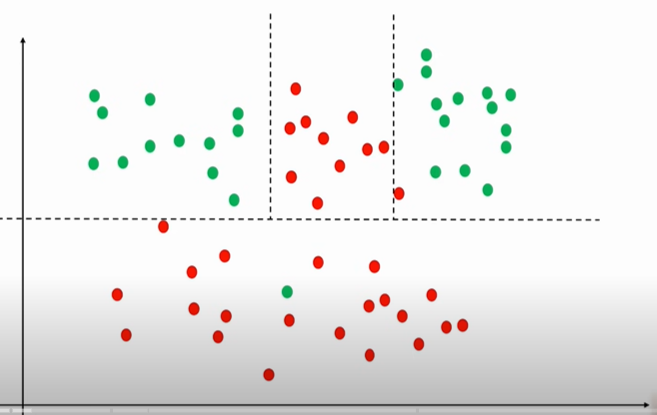


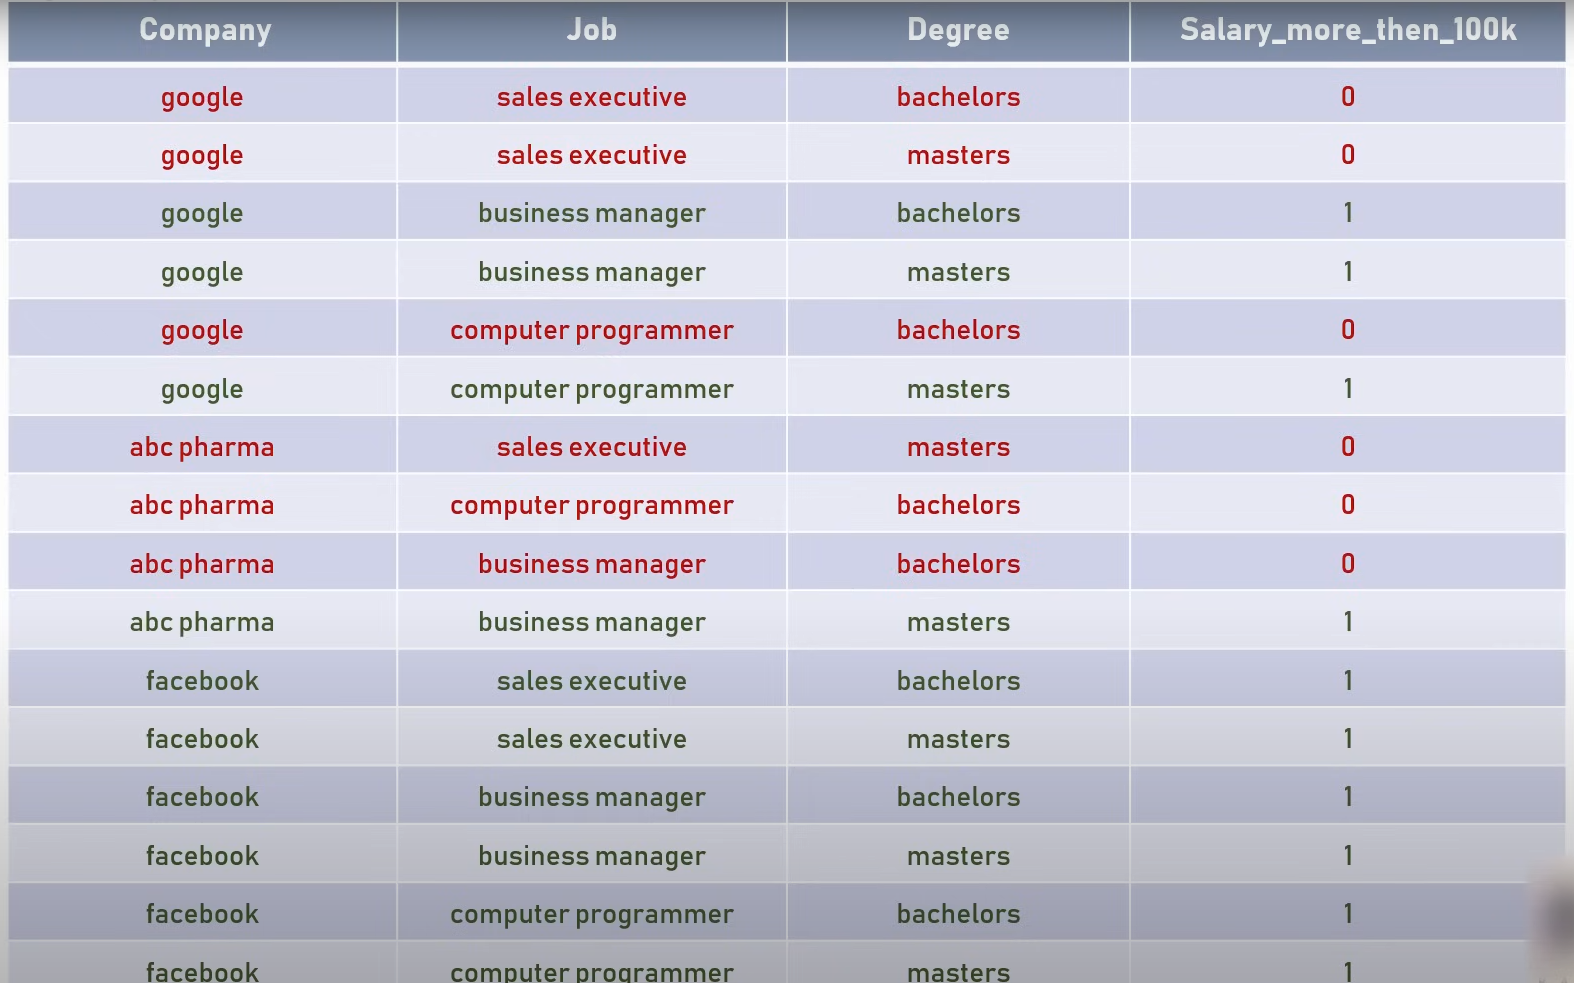
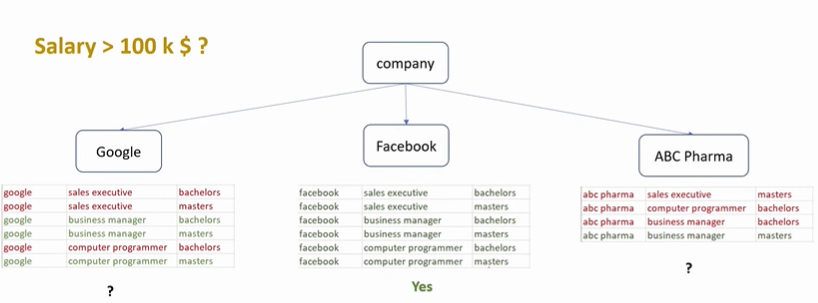
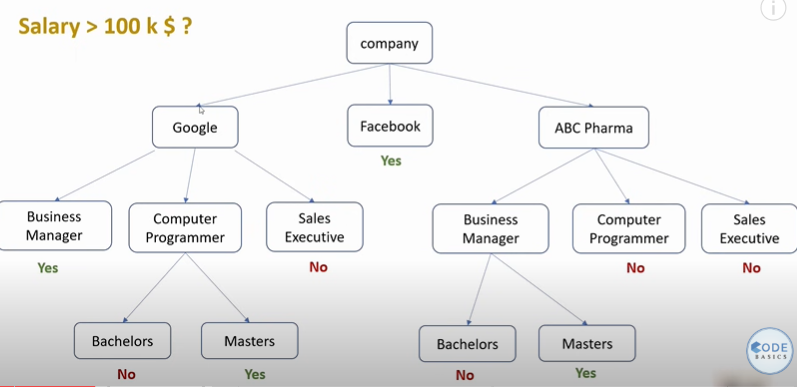

- We have to choose high information gain at each split
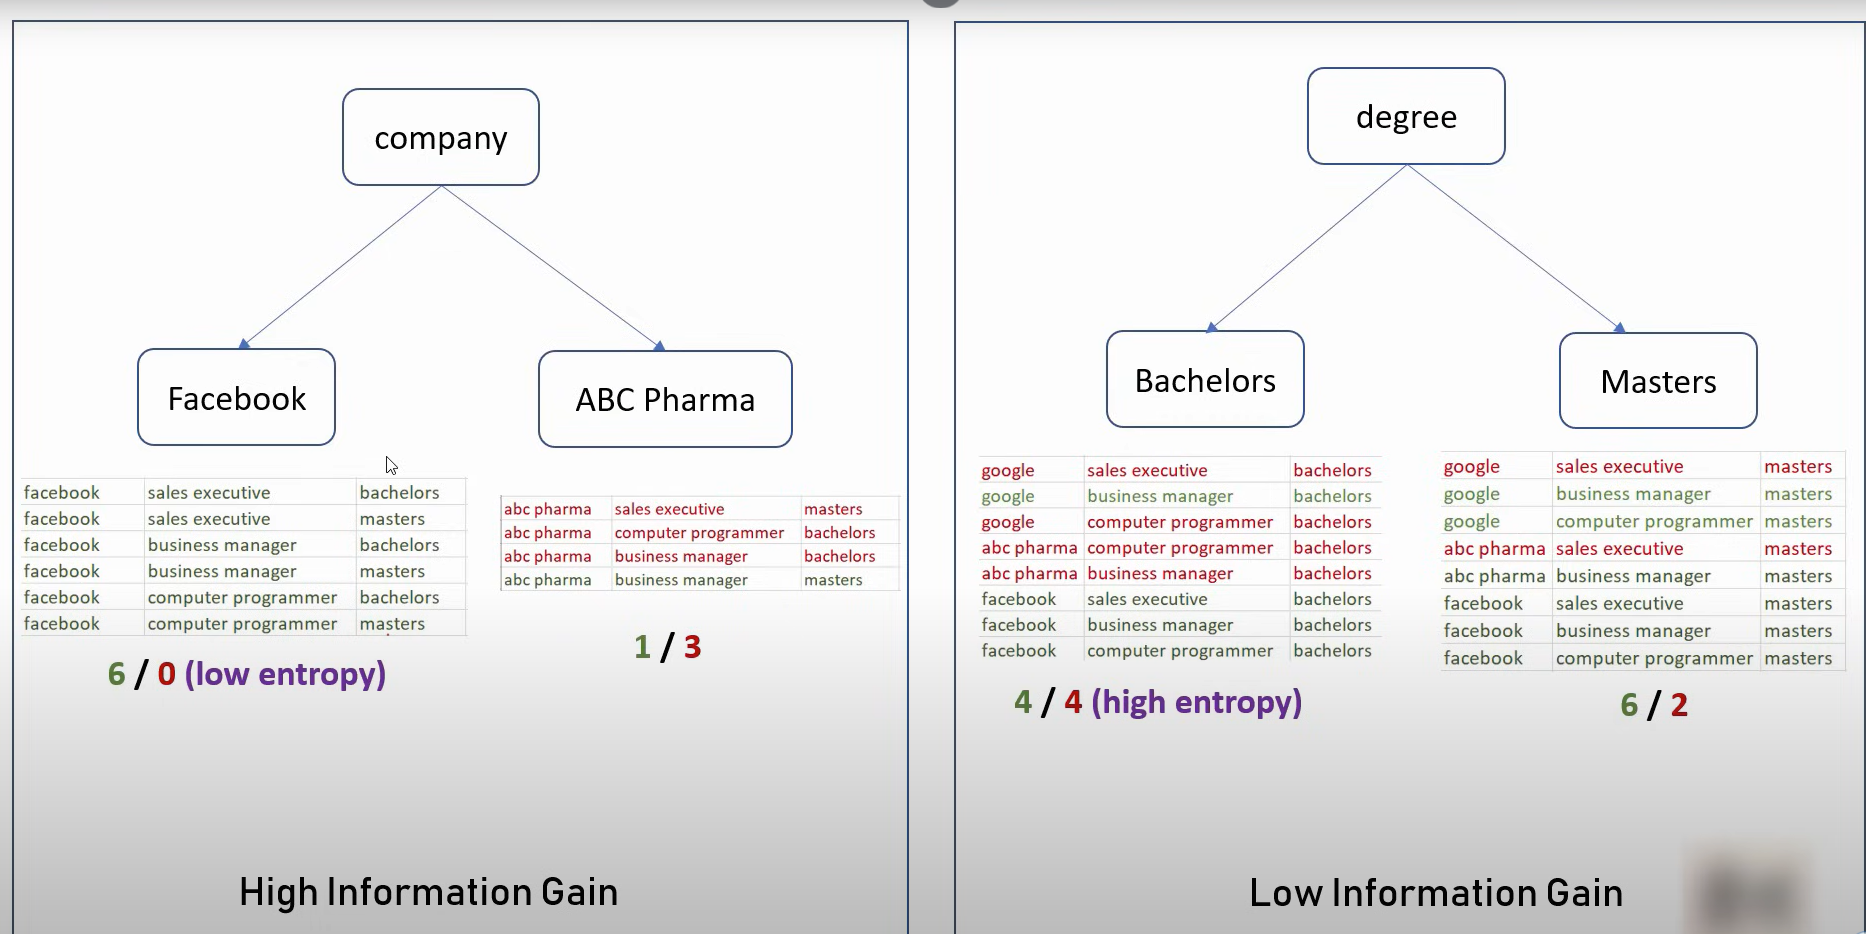


In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [12]:
X = df.drop('salary_more_then_100k', axis='columns')
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [13]:
y = df['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [16]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_company.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [19]:
X_n = X.drop(['company', 'job', 'degree'], axis='columns')
X_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [20]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [21]:
from sklearn import tree

In [23]:
model = tree.DecisionTreeClassifier()
model.fit(X_n, y)

DecisionTreeClassifier()

### Is salary of Google, computer Engineer, Bachelors degree > 100k

In [24]:
model.predict([[2, 1, 0]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Exercise : Buildl decision tree modell to predict survival bases on certain parameters
- https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv
- In this file using following columns build a model to predict if person would survive or not
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model

In [25]:
import pandas as pd

In [27]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
X = df[['Sex', 'Age', 'Fare']]
X

,Sex,Age,Fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,NaN,23.4500
889,male,26.0,30.0000


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Age     714 non-null    float64
 2   Fare    891 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.0+ KB


In [47]:
X['Age'] =X['Age'].fillna(X['Age'].mean())

C:\Users\surya\AppData\Local\Temp\ipykernel_4488\4103320538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] =X['Age'].fillna(X['Age'].mean())


In [48]:
X.Sex = X.Sex.map({'male':1, 'female':0})

C:\Users\surya\AppData\Local\Temp\ipykernel_4488\3028953973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Sex = X.Sex.map({'male':1, 'female':0})


In [50]:
X.head()

,Sex,Age,Fare
0,1,22.0,7.2500
1,0,38.0,71.2833
2,0,26.0,7.9250
3,0,35.0,53.1000
4,1,35.0,8.0500


In [51]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
len(X_train)

623

In [74]:
len(X_test)

268

In [75]:
from sklearn import tree

In [76]:
model = tree.DecisionTreeClassifier()

In [77]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [79]:
y_test

553    1
324    0
564    0
399    1
391    1
      ..
760    0
349    0
132    0
206    0
244    0
Name: Survived, Length: 268, dtype: int64

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7798507462686567